In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


___
# Regressão Linear

Você acabou de conseguir um contrato de trabalho com uma empresa de comércio eletrônico com sede na cidade de Nova York que vende roupas online, mas também tem sessões de aconselhamento sobre roupas e estilo na loja.

Os clientes entram na loja, têm encontros com um estilista pessoal e, em seguida, podem ir para casa e fazer o pedido em um aplicativo no celular ou no site das roupas que desejam.

A empresa está tentando decidir se concentra seus esforços em sua experiência de aplicativo celular ou em seu site. Eles contrataram você para ajudá-los a descobrir! Vamos começar!

Tem informações do cliente, como e-mail, endereço e a cor do seu Avatar. Em seguida, também tem colunas de valores numéricos:

* Avg. Session Length: Duração média da sessão com aconselhamento de estilo na loja.
* Time on App: Tempo médio gasto no aplicativo em minutos
* Time on Website: Tempo médio gasto no site em minutos
* Length of Membership: Há quantos anos o cliente é membro

In [24]:
df = pd.read_csv("https://raw.githubusercontent.com/araj2/customer-database/master/Ecommerce%20Customers.csv")
df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


# Separar em treino e teste e a variável target das features
<img src="https://i.ibb.co/3csjYT2/image.png" width="400" height="100"/>

In [25]:
x = df.drop(columns=['Yearly Amount Spent'],axis=1)
y = df['Yearly Amount Spent']

In [26]:
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2)

# Retirar colunas que não usaremos no nosso modelo

<img src="https://cdn2.iconfinder.com/data/icons/flat-pro-word-processing-set-5/32/table-column-delete-512.png" width="200" height="100"/>

In [27]:
train_x = train_x.drop(columns=['Address','Email','Avatar'], axis = 1)
test_x = test_x.drop(columns=['Address','Email','Avatar'], axis = 1)

In [28]:
LR = LinearRegression().fit(train_x,train_y)

In [29]:
print('Coefficientes: \n', LR.coef_)

Coefficientes: 
 [25.60450459 38.34357092  0.67544059 62.08798118]


## Predição dos dados de Teste

Text(0, 0.5, 'Predito Y')

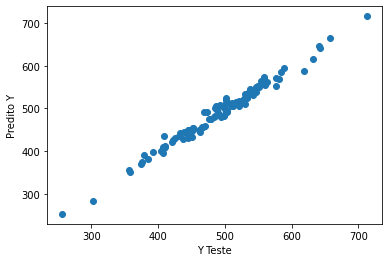

In [30]:
plt.scatter(test_y,LR.predict(test_x))
plt.xlabel('Y Teste')
plt.ylabel('Predito Y')

# Métricas

In [31]:
# calculate these metrics by hand!

print('MAE:', metrics.mean_absolute_error(test_y, LR.predict(test_x)))
print('MSE:', metrics.mean_squared_error(test_y, LR.predict(test_x)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, LR.predict(test_x))))

MAE: 7.927949674052516
MSE: 106.53754298382827
RMSE: 10.321702523509785


# Resíduos

Você deveria ter obtido um modelo muito bom com um bom ajuste. Vamos explorar rapidamente os resíduos para ter certeza de que está tudo certo com nossos dados.

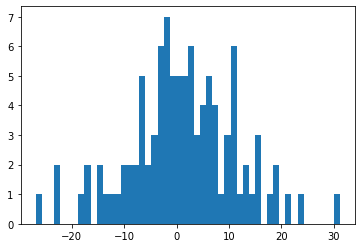

In [32]:
plt.hist((test_y-LR.predict(test_x)),bins=50);

## Conclusion

Ainda queremos descobrir a resposta para a pergunta original, focamos nosso esforço no desenvolvimento de aplicativos móveis ou de sites? Ou talvez isso nem mesmo importe, e o tempo de filiação é o que é realmente importante. Vamos ver se podemos interpretar os coeficientes para ter uma ideia.

In [33]:
coeffecients = pd.DataFrame(LR.coef_,train_x.columns)
coeffecients.columns = ['Coeficientes']
coeffecients

,Coeficientes
Avg. Session Length,25.604505
Time on App,38.343571
Time on Website,0.675441
Length of Membership,62.087981


** Como você pode interpretar esses coeficientes? **

Interpreting the coefficients:

- Mantendo todos os outros coeficientes fixos, um aumento de 1 unidade em **Avg. Session Length** está associonado com um  **aumento de 25.98 total de dólares gastos**.
- Mantendo todos os outros coeficientes fixos, um aumento de 1 unidade em **Time on App** está associonado com um  **aumento de 38.59 total de dólares gastos**.
- Mantendo todos os outros coeficientes fixos, um aumento de 1 unidade em **Time on Website** está associonado com um  **aumento de 0.19 total de dólares gastos**.
- Mantendo todos os outros coeficientes fixos, um aumento de 1 unidade em **Length of Membership** está associonado com um  **aumento de 61.27 total de dólares gastos**.

**Você acha que a empresa deveria se concentrar mais em seu aplicativo móvel ou em seu site?**